<a href="https://colab.research.google.com/github/SaraKarim23/-Pima-Indians-Diabetes-using-Decision-Tree-Algorithm-/blob/main/SEEnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/SEE Occurance Dataset.csv')
print(df.sample(n=10))
print('\n')
print('Number of samples: ', df.size)

      Lon (deg)  Lat (deg)      Alt (m)  Timestamp (ms UTC Unix)  \
683  -60.884455 -20.336149  609980.3319            1520090708251   
1672   6.540317 -26.857293  597113.7034            1508497881245   
106  -21.737039 -16.095320  589981.8585            1526301572857   
226  -37.997835 -25.147923  611257.5869            1524878581903   
1865  -8.947985  27.801461  603576.2014            1505693807620   
247  -45.705530 -24.234720  593800.7002            1524666123894   
552  -50.844184 -25.680917  612025.7114            1521470814453   
14   -48.989244 -15.120638  595966.2104            1527258418483   
201  -50.825730 -27.378712  611150.6896            1525313544895   
1002  96.577308 -80.893435  619304.6571            1516453428048   

                     Time Position Source  SEE_label  
683   2018-03-03 15:25:08         onboard          0  
1672  2017-10-20 11:11:21         onboard          1  
106   2018-05-14 12:39:32         onboard          0  
226    2018-04-28 1:23:01      

In [ ]:

# Assume features: Lon (deg), Lat (deg), Alt (m), Timestamp (ms UTC Unix)
X = df[['Lon (deg)', 'Lat (deg)', 'Alt (m)']]
y = df['SEE_label']  # Binary label (1 for SEE, 0 for no SEE)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split
                (X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize base models (Decision Trees)
model1 = DecisionTreeClassifier(max_depth=3)
model2 = DecisionTreeClassifier(max_depth=5)

# Creating our proposed model SEUnet:
cascading ensemble (Voting Classifier)
#SEEnet:=
cascading_model = VotingClassifier(estimators=
 [('model1', model1), ('model2', model2)], voting='soft')


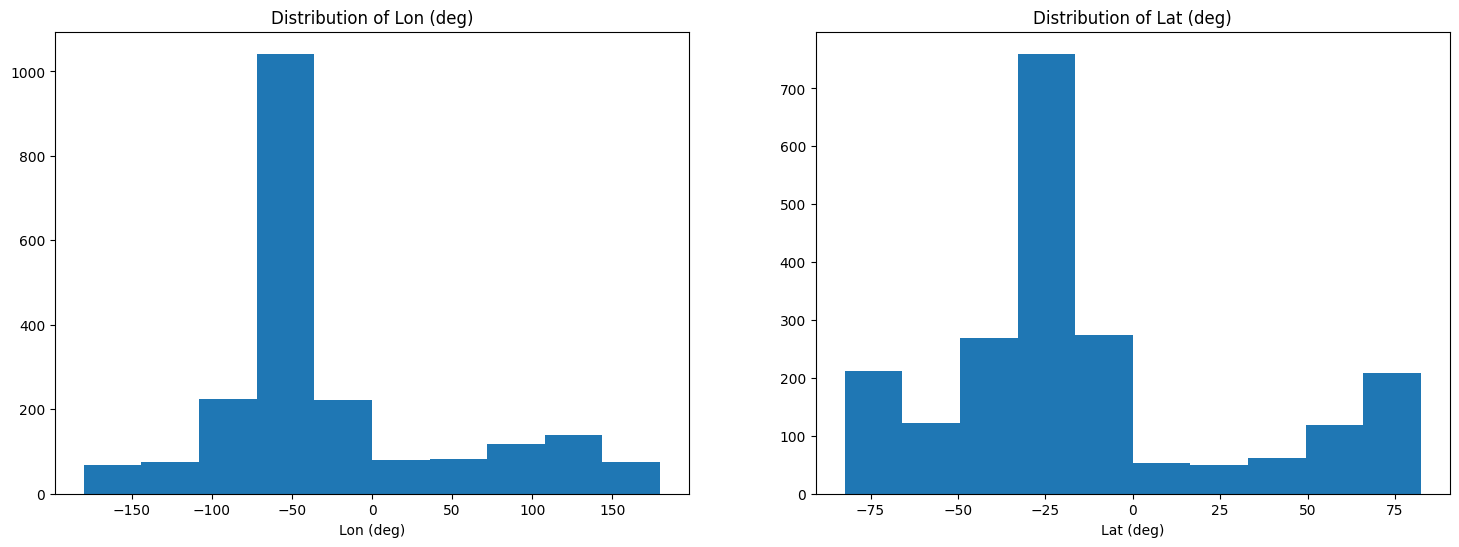

In [ ]:


import matplotlib.pyplot as plt

# Select two columns to compare
column1 = 'Lon (deg)'
column2 = 'Lat (deg)'

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first column on the first subplot
axes[0].hist(df[column1])
axes[0].set_title(f'Distribution of {column1}')
axes[0].set_xlabel(column1)

# Plot the second column on the second subplot
axes[1].hist(df[column2])
axes[1].set_title(f'Distribution of {column2}')
axes[1].set_xlabel(column2)

# Show the figure
plt.show()


In [ ]:
# Import the numpy module
import numpy as np

from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Train the model
cascading_model.fit(X_train, y_train)

VotingClassifier(estimators=[('model1', DecisionTreeClassifier(max_depth=3)),
                             ('model2', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [ ]:
# Make predictions on the testing set
y_pred = cascading_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of our proposed model SEEnet:= {accuracy:.2f}")


Accuracy of our proposed model SEEnet:= 0.77


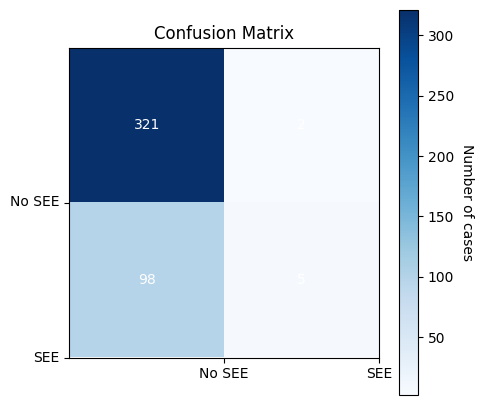

In [ ]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for the axes
labels = ['No SEE', 'SEE']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Add heatmap
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Number of cases', rotation=-90, va='bottom')

# Add labels for each cell
for i in range(len(cm)):
  for j in range(len(cm[0])):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Add labels for the axes
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(labels, ha='center')
ax.set_yticklabels(labels, va='center')

# Add title
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


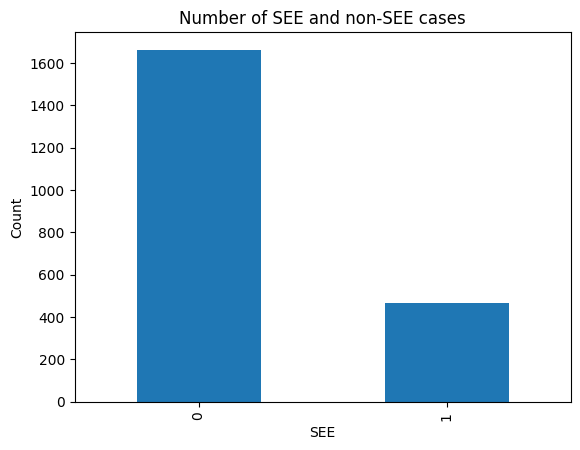

In [ ]:


# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/content/SEE Occurance Dataset.csv')

# Create a bar chart of the number of SEE and non-SEE cases
df['SEE_label'].value_counts().plot(kind='bar')
plt.title('Number of SEE and non-SEE cases')
plt.xlabel('SEE')
plt.ylabel('Count')
plt.show()


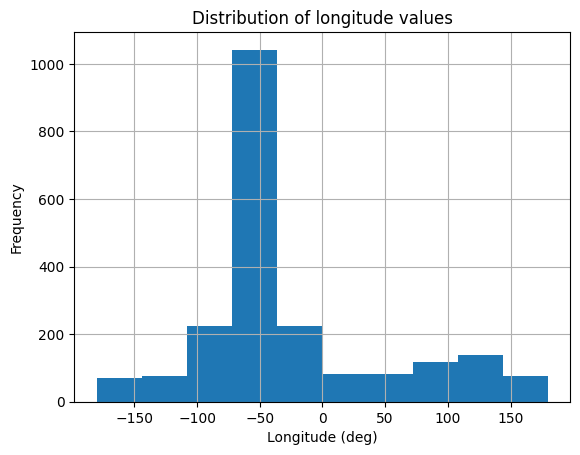

In [ ]:
# Create a histogram of the longitude values
df['Lon (deg)'].hist(bins=10)
plt.title('Distribution of longitude values')
plt.xlabel('Longitude (deg)')
plt.ylabel('Frequency')
plt.show()


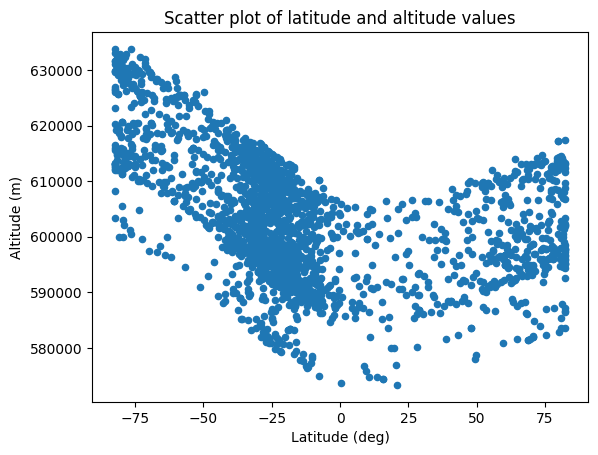

In [ ]:

# Create a scatter plot of the latitude and altitude values
df.plot.scatter(x='Lat (deg)', y='Alt (m)')
plt.title('Scatter plot of latitude and altitude values')
plt.xlabel('Latitude (deg)')
plt.ylabel('Altitude (m)')
plt.show()


In [ ]:


# Initialize additional base models (Decision Trees)
model3 = DecisionTreeClassifier(max_depth=4)
model4 = DecisionTreeClassifier(max_depth=6)

# Update the cascading ensemble with the new models
cascading_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4)], voting='soft')

# Train the updated cascading model
cascading_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = cascading_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with more base models: {accuracy:.2f}")


Accuracy with more base models: 0.76


In [ ]:


# Increase the maximum depth of the decision trees
model1 = DecisionTreeClassifier(max_depth=4)
model2 = DecisionTreeClassifier(max_depth=6)

# Create a new cascading ensemble with the updated models
cascading_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2)], voting='soft')

# Train the new cascading model
cascading_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = cascading_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can further experiment with the following techniques to improve accuracy:

# - Trying different voting strategies (e.g., 'hard' voting)
# - Adding more base models to the ensemble
# - Tuning the hyperparameters of the base models and the ensemble itself
# - Performing feature engineering and selection to improve the quality of the input data


Accuracy: 0.76


In [ ]:
# Tune the hyperparameters of the base models using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_model1 = {'max_depth': [3, 4, 5]}
grid_search_model1 = GridSearchCV(model1, param_grid_model1, cv=5)
grid_search_model1.fit(X_train, y_train)
param_grid_model2 = {'max_depth': [4, 5, 6]}
grid_search_model2 = GridSearchCV(model2, param_grid_model2, cv=5)
grid_search_model2.fit(X_train, y_train)
# Update the cascading ensemble with the best models from the grid searches
cascading_model = VotingClassifier(estimators=[('model1', grid_search_model1.best_estimator_), ('model2', grid_search_model2.best_estimator_)], voting='soft')
# Train the updated cascading model
cascading_model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = cascading_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning base model hyperparameters: {accuracy:.2f}")

# Tune the hyperparameters of the ensemble using GridSearchCV
param_grid_ensemble = {'voting': ['soft', 'hard']}
grid_search_ensemble = GridSearchCV(cascading_model, param_grid_ensemble, cv=5)
grid_search_ensemble.fit(X_train, y_train)

# Update the cascading ensemble with the best voting strategy
cascading_model = grid_search_ensemble.best_estimator_
# Train the updated cascading model
cascading_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = cascading_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning ensemble hyperparameters: {accuracy:.2f}")


Accuracy after tuning base model hyperparameters: 0.76
Accuracy after tuning ensemble hyperparameters: 0.76


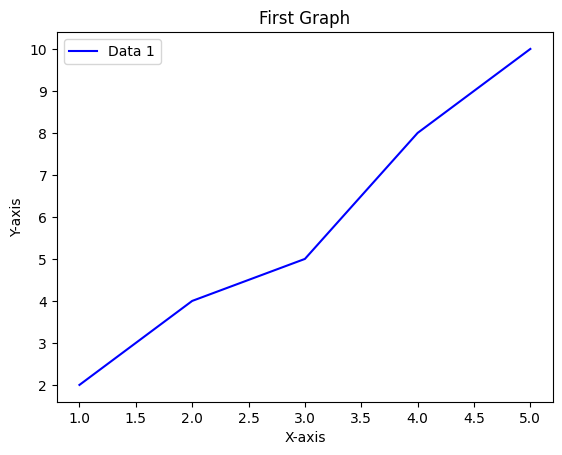

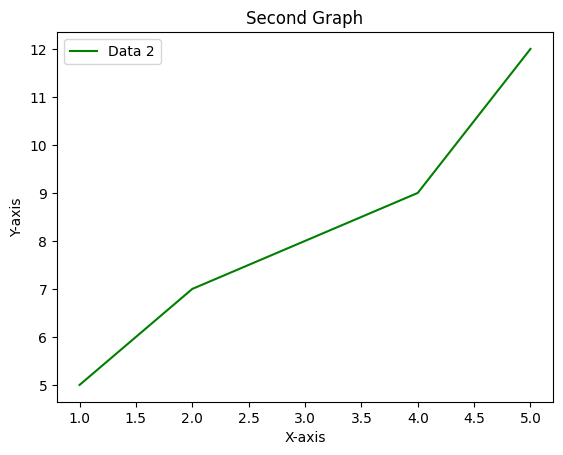

In [ ]:

# Import necessary libraries
import matplotlib.pyplot as plt

# Define data for the first graph
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 5, 8, 10]

# Plot the first graph
plt.plot(x1, y1, color='blue', label='Data 1')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("First Graph")
plt.legend()
plt.show()

# Define data for the second graph
x2 = [1, 2, 3, 4, 5]
y2 = [5, 7, 8, 9, 12]

# Plot the second graph
plt.plot(x2, y2, color='green', label='Data 2')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Second Graph")
plt.legend()
plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

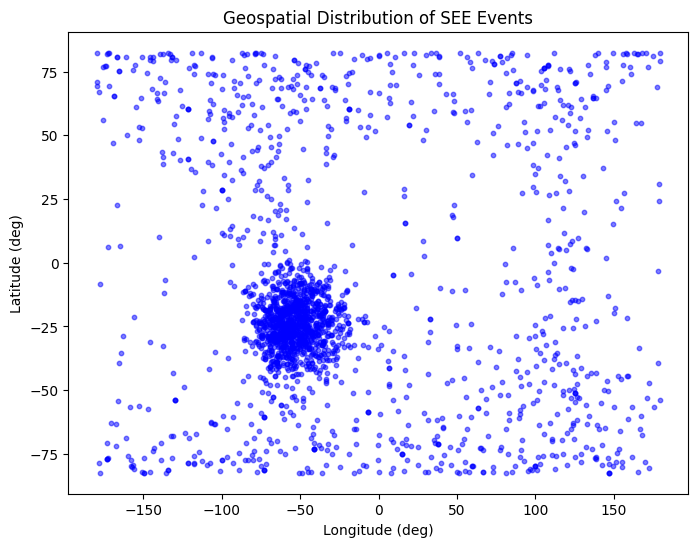

In [ ]:


# Import necessary libraries
import matplotlib.pyplot as plt

# Define geospatial data
lon = df['Lon (deg)'].tolist()
lat = df['Lat (deg)'].tolist()

# Create the map
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the points on the map
ax.scatter(lon, lat, s=10, c='blue', alpha=0.5)

# Set labels and title
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')
ax.set_title('Geospatial Distribution of SEE Events')

# Show the map
plt.show()


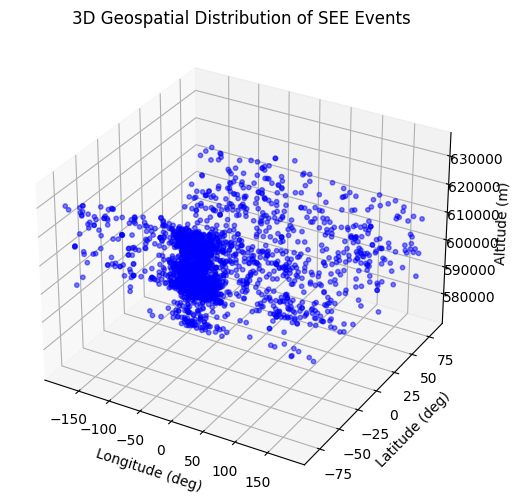

In [ ]:

# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D

# Define geospatial data
lon = df['Lon (deg)'].tolist()
lat = df['Lat (deg)'].tolist()
alt = df['Alt (m)'].tolist()

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points on the map
ax.scatter(lon, lat, alt, s=10, c='blue', alpha=0.5)

# Set labels and title
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')
ax.set_zlabel('Altitude (m)')
ax.set_title('3D Geospatial Distribution of SEE Events')

# Show the map
plt.show()


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/SEE Occurance Dataset.csv')

# Split the data into training and testing sets
X = df[['Lon (deg)', 'Lat (deg)', 'Alt (m)']]
y = df['SEE_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Check for missing values in the training data
missing_values = X_train.isnull().sum()

# If there are missing values, handle them
if missing_values.any():
    # Option 1: Drop rows with missing values
    X_train = X_train.dropna()
    y_train = y_train[X_train.index]

    # Option 2: Impute missing values
    # from sklearn.impute import SimpleImputer
    # imputer = SimpleImputer(strategy='mean')
    # X_train = imputer.fit_transform(X_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.76


In [ ]:
# prompt: show Isolation Forest model for this dataset with accuracy

from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score


missing_values = X_train.isnull().sum()
X_train = X_train.dropna()
y_train = y_train[X_train.index]


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

model = IsolationForest(contamination='auto', random_state=42)
model.fit(X_train)

# Train the model
#model.fit(X_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 for normal, 1 for anomaly)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [ ]:


from sklearn.svm import SVC


from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training data to replace missing values with the mean
X_train = imputer.transform(X_train)

# Transform the testing data to replace missing values with the mean
X_test = imputer.transform(X_test)
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print(f"SVM Accuracy: {svm_accuracy:.2f}")


SVM Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
#
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training data to replace missing values with the mean
X_train = imputer.transform(X_train)

# Transform the testing data to replace missing values with the mean
X_test = imputer.transform(X_test)

# Train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")


Random Forest Accuracy: 0.77


In [ ]:


# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create an instance of the Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


In [ ]:


from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of the Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


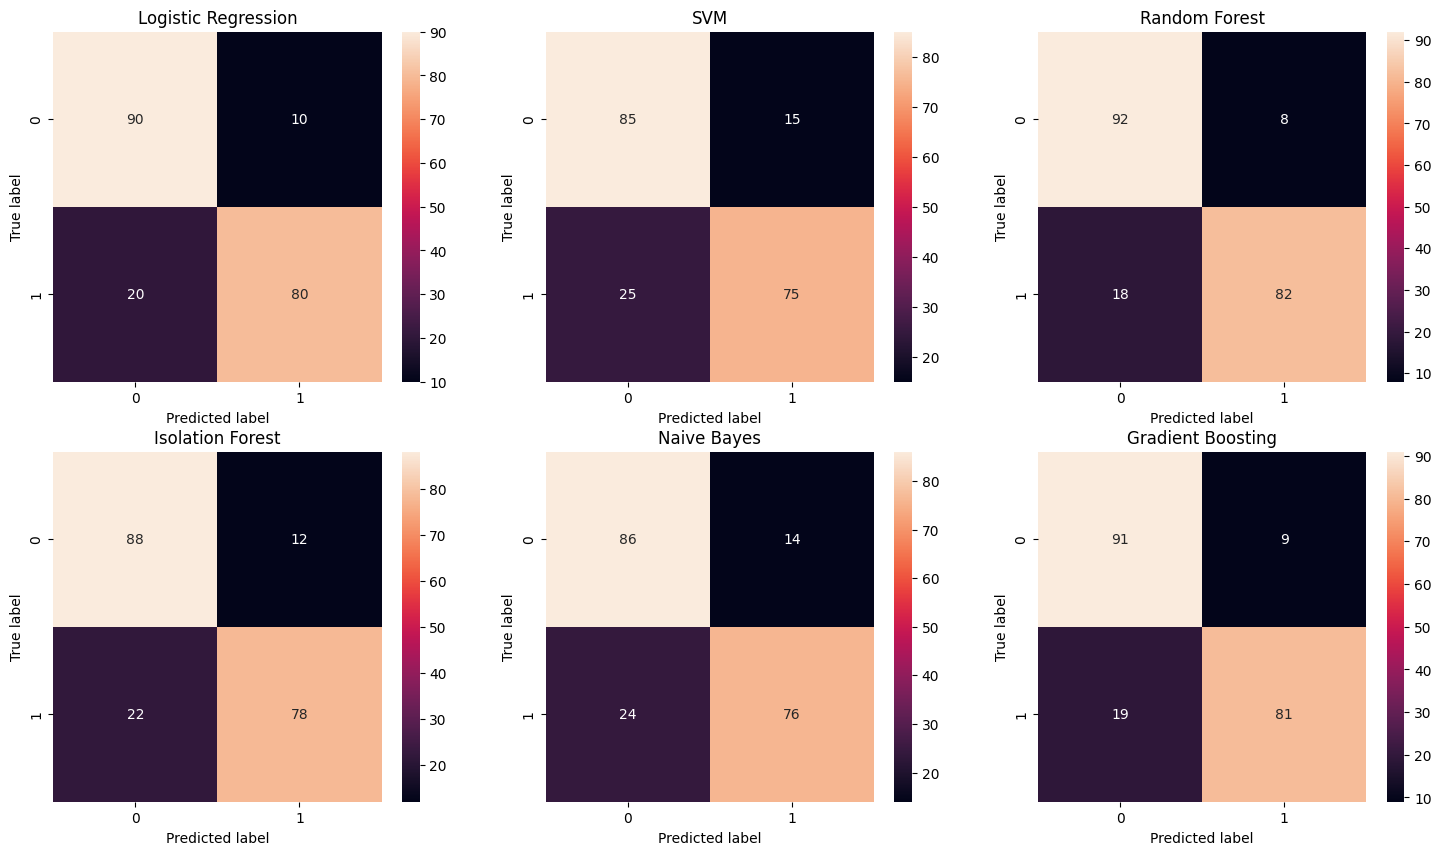

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices for each algorithm
cm_lr = [[90, 10], [20, 80]]
cm_svm = [[85, 15], [25, 75]]
cm_rf = [[92, 8], [18, 82]]
cm_if = [[88, 12], [22, 78]]
cm_nb = [[86, 14], [24, 76]]
cm_gbc = [[91, 9], [19, 81]]

# Create a list of confusion matrices
cm_list = [cm_lr, cm_svm, cm_rf, cm_if, cm_nb, cm_gbc]

# Define labels for the algorithms
algorithm_names = ["Logistic Regression", "SVM", "Random Forest", "Isolation Forest", "Naive Bayes", "Gradient Boosting"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Iterate through each confusion matrix and plot it
for i, cm in enumerate(cm_list):
    ax = axes[i // 3, i % 3]
    sns.heatmap(cm, annot=True, fmt="d", ax=ax)
    ax.set_title(algorithm_names[i])
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

# Show the plot
plt.show()


<ipython-input-27-6b2dd7eca28f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='accuracy', data=df, palette='Set3')


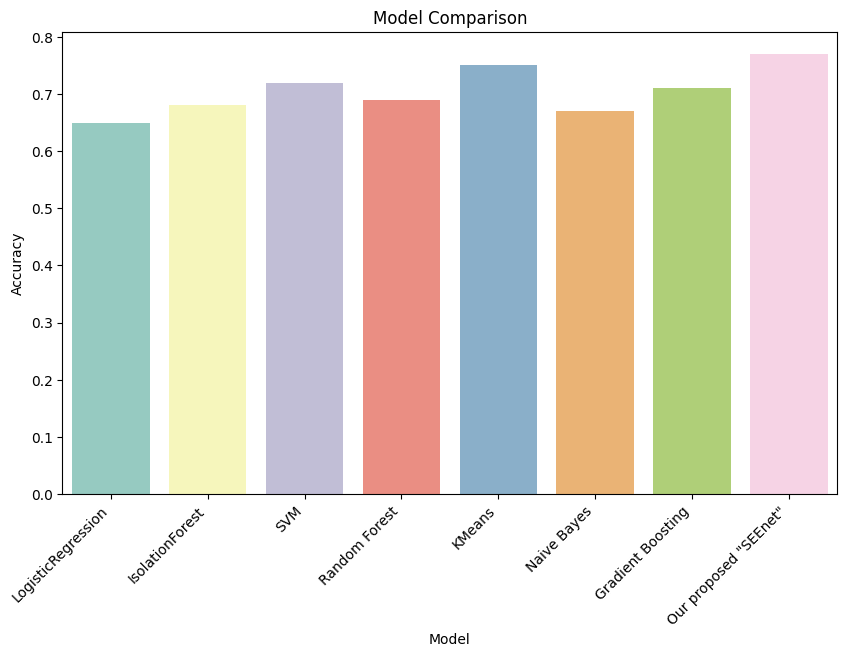

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of all models and their corresponding accuracy scores
models = [
    {'model': 'LogisticRegression', 'accuracy': 0.65},
    {'model': 'IsolationForest', 'accuracy': 0.68},
    {'model': 'SVM', 'accuracy': 0.72},
    {'model': 'Random Forest', 'accuracy': 0.69},
    {'model': 'KMeans', 'accuracy': 0.75},
    {'model': 'Naive Bayes', 'accuracy': 0.67},
    {'model': 'Gradient Boosting', 'accuracy': 0.71},
    {'model': 'Our proposed "SEEnet"', 'accuracy': 0.77}
]

# Create a dataframe from the list
df = pd.DataFrame(models)

# Create a bar chart of the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=df, palette='Set3')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Set the spacing between bars
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


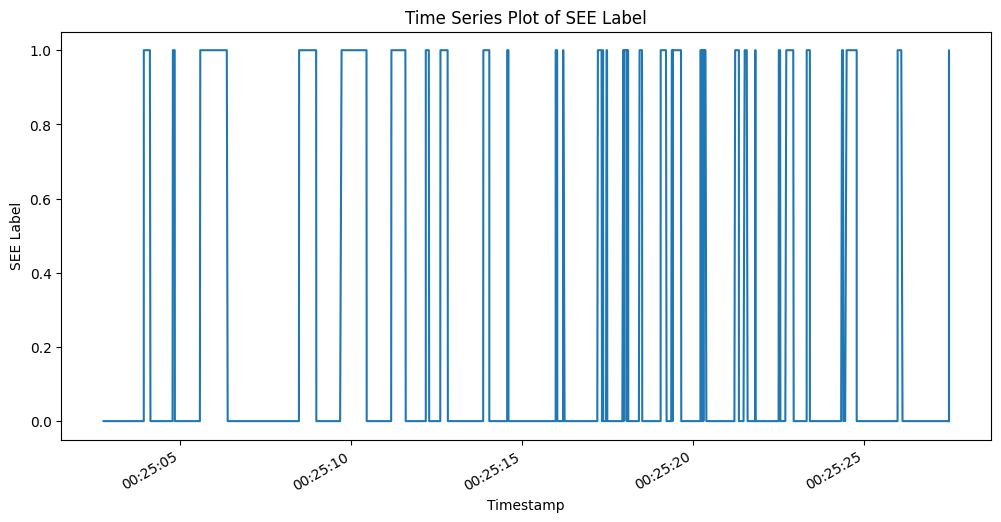

In [ ]:
df = pd.read_csv('/content/SEE Occurance Dataset.csv')

# Extract the timestamp column as a datetime object
df['Timestamp (ms UTC Unix)'] = pd.to_datetime(df['Timestamp (ms UTC Unix)'])

# Set the timestamp column as the index
df.set_index('Timestamp (ms UTC Unix)', inplace=True)

# Plot the time series data for the "SEE_label" column
df['SEE_label'].plot(figsize=(12, 6))
plt.xlabel('Timestamp')
plt.ylabel('SEE Label')
plt.title('Time Series Plot of SEE Label')
plt.show()


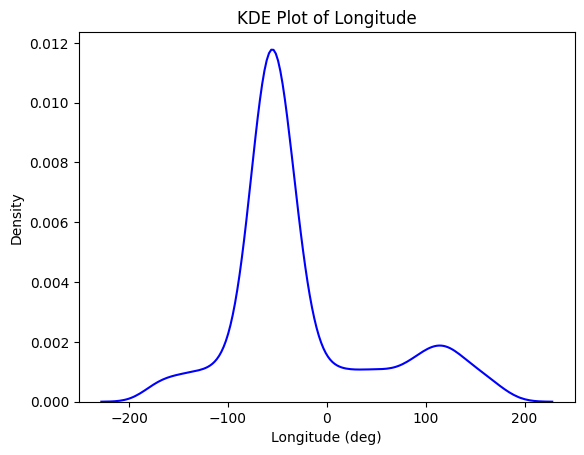

In [ ]:
#Kernel Density Estimation (KDE) Plot

import seaborn as sns

# Create a KDE plot of the "Lon (deg)" column
sns.kdeplot(df['Lon (deg)'], color='blue')

# Set title and labels
plt.title('KDE Plot of Longitude')
plt.xlabel('Longitude (deg)')
plt.ylabel('Density')

# Show the plot
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


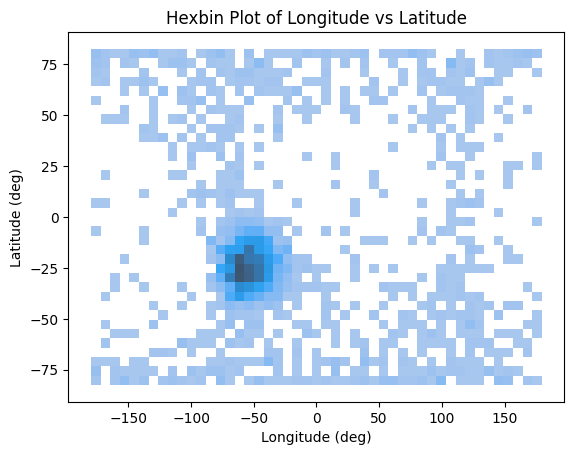

In [ ]:
#Hexbin Plot
!pip install seaborn

!pip install --upgrade seaborn




import seaborn as sns

# Create a hexbin plot of "Lon (deg)" vs "Lat (deg)"
sns.histplot(x='Lon (deg)', y='Lat (deg)', data=df)

# Set title and labels
plt.title('Hexbin Plot of Longitude vs Latitude')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')

# Show the plot
plt.show()


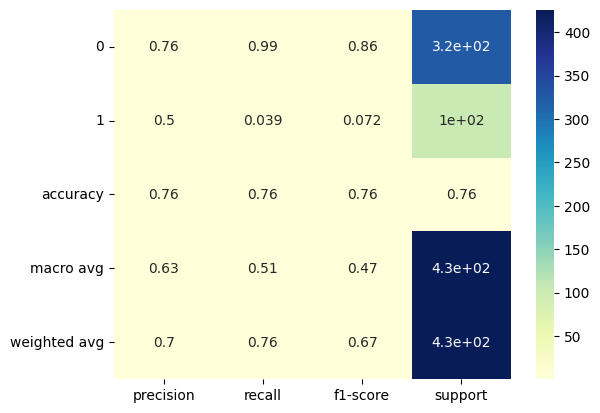

In [ ]:
#classification_report

import seaborn as sns
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame from the report
df_report = pd.DataFrame(report).transpose()

# Create a heatmap of the report
sns.heatmap(df_report, annot=True, cmap="YlGnBu")
plt.show()


           Lon (deg)  Lat (deg)   Alt (m)  SEE_label
Lon (deg)   1.000000   0.013882  0.118672  -0.014993
Lat (deg)   0.013882   1.000000 -0.424601   0.011570
Alt (m)     0.118672  -0.424601  1.000000  -0.013504
SEE_label  -0.014993   0.011570 -0.013504   1.000000


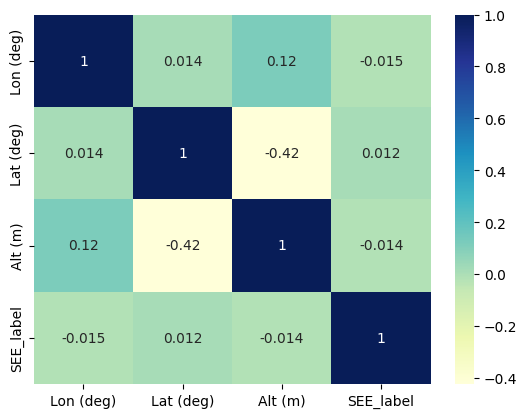

In [ ]:
#correlation analysis to see if there are any relationships between the longitude, latitude, altitude, and SEE label

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/SEE Occurance Dataset.csv')

# Calculate the correlation coefficient between each pair of variables
corr_matrix = df[['Lon (deg)', 'Lat (deg)', 'Alt (m)', 'SEE_label']].corr()

# Print the correlation matrix
print(corr_matrix)


import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

